In [3]:
# %pip install mysql-connector-python
# %pip install pandas
# %pip install scikit-learn
# %pip install numpy
#%pip install dtale
#%pip install scipy
import mysql.connector
import pandas as pd
import dtale
import numpy as np

In [4]:
#database connection
connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="1234",
            database =  "pszbooks3"
        )

In [5]:
query = 'select * from books;'
df = pd.read_sql(query, con = connection)

C:\Users\SSS\AppData\Local\Temp\ipykernel_17416\2017408121.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [9]:
df.head(3)

,idBook,title,publisher,year,number_of_pages,cover_binding,format_width,format_height,description,price
0,3,Grof Monte Kristo – I tom,laguna,2024.0,768.0,tvrd,13.0,20.0,Ljubav. Izdaja. Nevini zatočenik. Opasno bekst...,1799.0
1,6,Zenova savest,laguna,2024.0,450.0,tvrd,13.0,20.0,„Veliki moderni roman o komično-patetičnoj ilu...,1199.0
2,7,Velika očekivanja,laguna,2024.0,520.0,tvrd,13.0,20.0,Čuvena priča o siročetu koje je postalo džentl...,1499.0


In [6]:
from sklearn.impute import SimpleImputer #za podatke koji fale
from sklearn.compose import ColumnTransformer #za kodiranje kategorickih podataka na diskretne vrednosti
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split #za deljenje na training i test split
from sklearn.preprocessing import StandardScaler #za feature scaling
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In order to identify outliers we will use the triple standard deviation method and see how our continuous features agree with a normal distribution, looking at a distance of 3 or 5 standard deviations from the mean on either side as the cutoff.

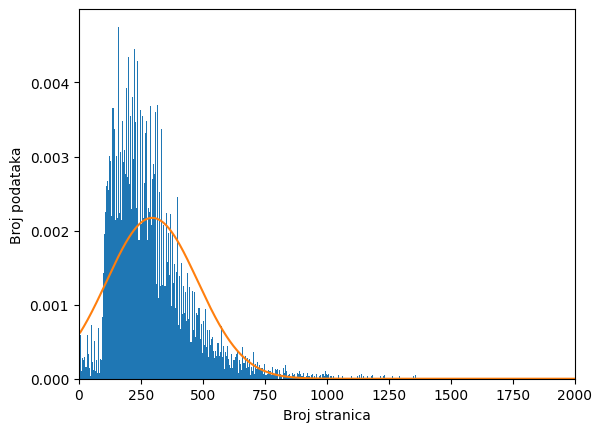

In [8]:
from scipy.stats import norm

plt.hist(df.number_of_pages, bins=1000, density=True)
plt.xlabel('Broj stranica')
plt.ylabel('Broj podataka')
plt.xlim(0, 2000)

range_for_normal_distribution = np.arange(df.number_of_pages.min(), df.number_of_pages.max(), 0.1)
plt.plot(range_for_normal_distribution, norm.pdf(range_for_normal_distribution, df.number_of_pages.mean(), df.number_of_pages.std()))

plt.show()






In [95]:
up_limit = df.number_of_pages.mean() + 5*df.number_of_pages.std()
up_limit

1422.6332550993054

In [98]:
down_limit = df.number_of_pages.mean() - 5*df.number_of_pages.std()
down_limit

-828.6963665778778

We can see the potential outliers below:

In [99]:
df[(df.number_of_pages > up_limit)]

,idBook,title,publisher,year,number_of_pages,cover_binding,format_width,format_height,description,price
1533,5478,Komplet - Fantastika,laguna,2021.0,2184.0,mek,13.0,20.0,Avanture koje prevazilaze najmaštovitije roman...,2999.0
1818,5907,Komplet - Redovi koji iznenađuju,laguna,2021.0,1904.0,mek,13.0,20.0,"Junaci koji pomeraju granice izdržljivosti, mo...",2499.0
1887,6081,Komplet - Ninova nagrada,laguna,2021.0,1897.0,mek,13.0,20.0,Komplet možete poručiti isključivo preko sajto...,2999.0
1889,6089,Komplet - Romani godine,laguna,2021.0,1496.0,mek,13.0,20.0,Komplet možete poručiti isključivo preko sajto...,1999.0
1890,6090,Komplet – True Crime,laguna,2021.0,2896.0,mek,13.0,20.0,Vrhunska dokumentaristička proza. Istinite pri...,2999.0
1893,6095,Komplet - Heroine svog vremena,laguna,2021.0,1740.0,mek,13.0,20.0,Komplet možete poručiti isključivo preko sajto...,2499.0
1911,6133,Komplet – Zlatno runo,laguna,2021.0,3728.0,mek uz kutiju,13.0,20.0,"Oživljavajući nam porodicu Njegovan, u istorij...",8999.0
2230,6753,Sabrana dela Mira Vuksanovića,laguna,2022.0,4198.0,tvrd,14.0,21.0,Sabrana dela akademika Mira Vuksanovića u deve...,12999.0
2568,7293,Vreme smrti - Komplet,laguna,2014.0,2112.0,kutija + mek,13.0,20.0,Delo koje s neprocenjivom snagom svedoči o tom...,5699.0
5279,11748,SVESKE LEONARDA DA VINČIJA 1-2,službeni glasnik,2011.0,1668.0,tvrd,22.0,22.0,Pretpostavlja se da je Leonardo da Vinči za ži...,3465.0


In [104]:
df[df.idBook == 17966]

,idBook,title,publisher,year,number_of_pages,cover_binding,format_width,format_height,description,price
10404,17966,ENGLESKO-SRPSKI ENCIKLOPEDIJSKI REČNIK,ik prometej,2009.0,15987.0,None,24.0,24.0,Ovaj englesko-srpski enciklopedijski rečnik na...,6875.0


2024-06-13 03:24:48,701 - INFO     - Executing shutdown due to inactivity...
2024-06-13 03:24:52,789 - INFO     - Executing shutdown...
2024-06-13 03:24:52,805 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


We can see that this row certainly represents an outlier, while the other books marked as outliers above will not be outliers.

In [105]:
df.drop(df[df['idBook'] == 17966].index, inplace=True)


After deletion:

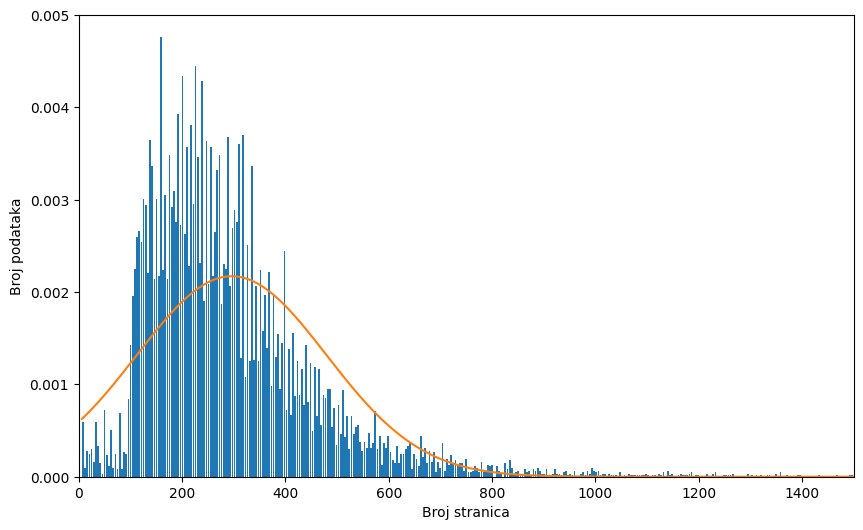

In [121]:
plt.hist(df.number_of_pages, bins=1000, rwidth=0.8, density=True)
plt.xlabel('Broj stranica')
plt.ylabel('Broj podataka')
plt.xlim(0, 1500)

range_for_normal_distribution = np.arange(df.number_of_pages.min(), df.number_of_pages.max())
plt.plot(range_for_normal_distribution, norm.pdf(range_for_normal_distribution, df.number_of_pages.mean(), df.number_of_pages.std()))

plt.show()


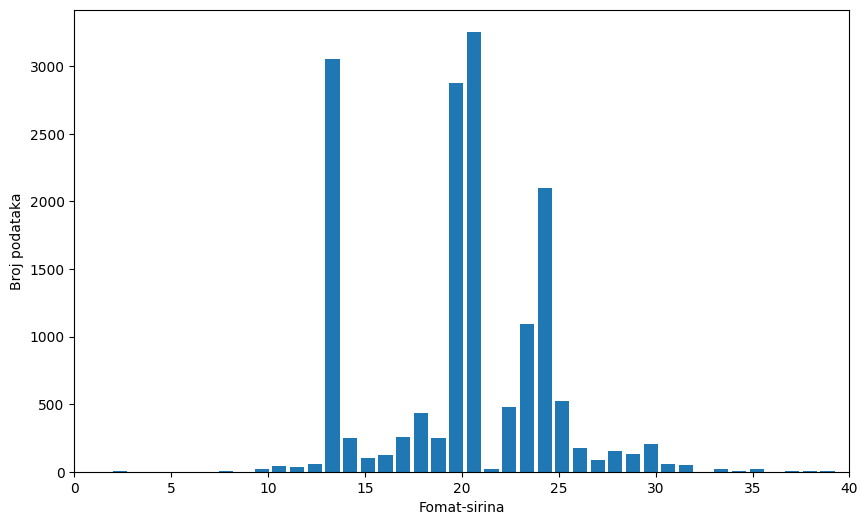

In [63]:
plt.hist(df.format_width, bins=80, rwidth=0.8)
plt.xlabel('Fomat-sirina')
plt.ylabel('Broj podataka')
plt.xlim(0, 40)
plt.show()



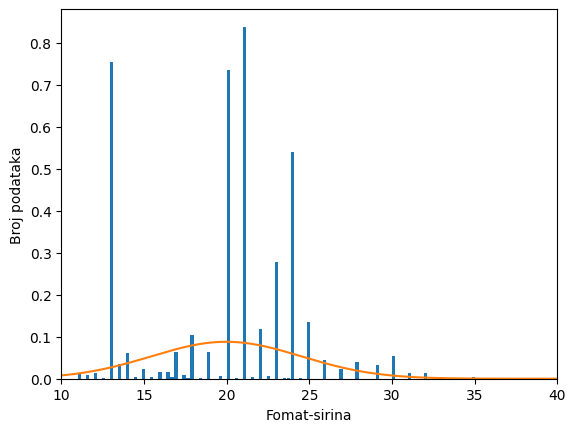

33.58341513362713
6.374512040764426


,idBook,title,publisher,year,number_of_pages,cover_binding,format_width,format_height,description,price
3112,8662,Knjiga kućica,laguna,2021.0,8.0,tvrd,74.0,30.0,"Istraži, čitaj, uči i igraj se! Ovo je jedna d...",799.0
3314,9088,VELIKA KNJIGA O SPORTU,vulkan izdavaštvo,2022.0,NaN,tvrd,40.0,40.0,U ovoj knjizi će ljubitelji sporta otkriti pre...,2241.0
3375,9157,DINOSAURIJUM,data status,2023.0,NaN,tvrd,38.0,38.0,"Ovaj ""muzej"" prikazuje život na Zemlji kakav n...",3356.0
3720,9581,100 NAJLEPŠIH NACIONALNIH PARKOVA NA SVETU,mladinska knjiga,2009.0,208.0,tvrd,35.0,35.0,Putovanje preko pet kontinenata. Ova knjiga će...,3231.0
3859,9741,SREBRNI LETAČ: PARABOLA,darkwood,2022.0,NaN,tvrd,34.0,34.0,Galaktus je prevratio čovečanstvo u svoje sled...,2241.0
4015,9907,KONAN DIVLJI MAČ SIMERIJE 10,darkwood,2014.0,344.0,tvrd,35.0,35.0,"Živi mrtvaci, podzemni tuneli, đavolske legije...",2646.0
4016,9908,"ĐORĐE LOBAČEV: SABRANA DELA. KNJ. 2, PRINCEZA ...",makondo,2019.0,258.0,tvrd,35.0,35.0,None,1706.0
4032,9927,LENS 4 (1958-1960),makondo,2017.0,NaN,tvrd,35.0,35.0,None,1544.0
4070,9970,LENS 3 (1957-1958),makondo,2017.0,NaN,tvrd,35.0,35.0,None,1544.0
4082,9982,ĐORĐE LOBAČEV - SABRANA DELA 1 - PLAVA PUSTOLO...,makondo,2018.0,248.0,tvrd,35.0,35.0,Reč izdavača S velikim ponosom vam predstavlja...,1978.0


In [10]:
plt.hist(df.format_width, bins=300, rwidth=0.8, density=True)
plt.xlabel('Fomat-sirina')
plt.ylabel('Broj podataka')
plt.xlim(10, 40)

range_for_normal_distribution = np.arange(df.format_width.min(), df.format_width.max(), 0.1)
plt.plot(range_for_normal_distribution, norm.pdf(range_for_normal_distribution, df.format_width.mean(), df.format_width.std()))

plt.show()

up_limit = df.format_width.mean() + 3*df.format_width.std()
print(up_limit)
down_limit = df.format_width.mean() - 3*df.format_width.std()
print(down_limit)

df[(df.format_width > up_limit) | (df.format_width < down_limit)]


Looking at the site, we can see that indeed some of these books were entered with the wrong dimensions! We will delete them from the database.

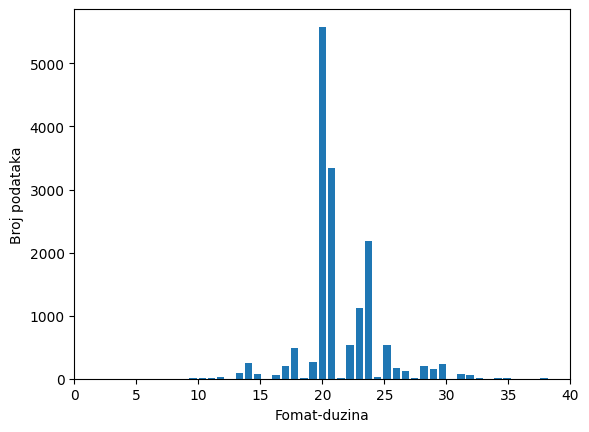

In [10]:
plt.hist(df.format_height, bins=200, rwidth=0.8)
plt.xlabel('Fomat-duzina')
plt.ylabel('Broj podataka')
plt.xlim(0, 40)
plt.show()

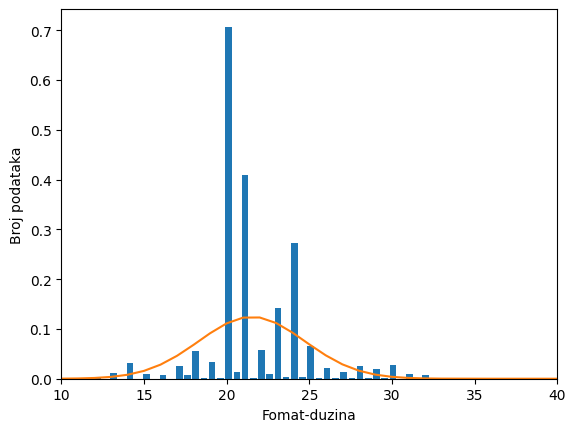

37.55195862306964
5.490289048714899


,idBook,title,publisher,year,number_of_pages,cover_binding,format_width,format_height,description,price
2747,7632,Mali princ – ilustrovano izdanje,laguna,2023.0,80.0,tvrd,24.5,40.0,Mali princ je čudesna poetska priča koja se de...,1899.0
3136,8728,"Ko je viši, ti ili tigar? (visinomer)",laguna,2020.0,10.0,mek,25.0,150.0,Visinomer sa nalepnicama i zanimljivim činjeni...,799.0
3314,9088,VELIKA KNJIGA O SPORTU,vulkan izdavaštvo,2022.0,NaN,tvrd,40.0,40.0,U ovoj knjizi će ljubitelji sporta otkriti pre...,2241.0
3375,9157,DINOSAURIJUM,data status,2023.0,NaN,tvrd,38.0,38.0,"Ovaj ""muzej"" prikazuje život na Zemlji kakav n...",3356.0
4139,10044,MUZEJ UMETNOSTI,data status,2017.0,992.0,tvrd,42.0,42.0,„Zašto kupiti običnu knjigu o umetnosti kada m...,23760.0
5926,12666,VLADARI SRBIJE,mladinska knjiga,2013.0,384.0,tvrd,39.0,39.0,NAPOMENA: KNJIGA NIJE NA MAJSKOJ AKCIJI.Za sve...,35991.0
6151,12907,OVE PRIČE NA IGRU LIČE,kreativni centar,2021.0,NaN,broš,38.7,38.7,Ovaj radni materijal sadrži raznovrsne podstic...,990.0
6530,13311,PRAZNA PLANETA,službeni glasnik,2019.0,257.0,broš,51.0,51.0,Veliki presudan događaj XXI veka – jedan od on...,792.0
6829,13646,SOVA - VELIKI PORODIČNI LEKSIKON,mladinska knjiga,2011.0,1214.0,tvrd,21.0,39.0,"Za 2 kupljene knjige, druga jeftinija knjiga j...",11691.0
8022,15026,JASENOVAC - AUSCHWITZ OF THE BALKANS,knjiga komerc,2018.0,710.0,tvrd,39.0,39.0,Ova knjiga nije uperena ni protiv jednog narod...,11880.0


In [13]:
plt.hist(df.format_height, bins=300, rwidth=0.8, density=True)
plt.xlabel('Fomat-duzina')
plt.ylabel('Broj podataka')
plt.xlim(10, 40)

range_for_normal_distribution = np.arange(df.format_height.min(), df.format_height.max())
plt.plot(range_for_normal_distribution, norm.pdf(range_for_normal_distribution, df.format_height.mean(), df.format_height.std()))

plt.show()

up_limit = df.format_height.mean() + 5*df.format_height.std()
print(up_limit)
down_limit = df.format_height.mean() - 5*df.format_height.std()
print(down_limit)

df[(df.format_height > up_limit) | (df.format_height < down_limit)]


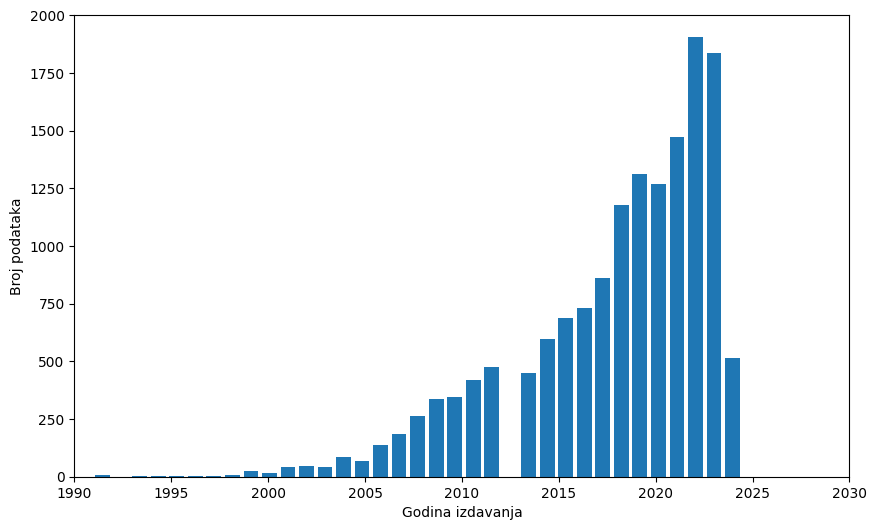

In [53]:
plt.hist(df.year, bins=2000, rwidth=0.8)
plt.xlabel('Godina izdavanja')
plt.ylabel('Broj podataka')
plt.xlim(1990, 2030)
plt.show()